In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Handling Missing Values

In [12]:
df = pd.read_csv("diabetic_prediction_dataset_v2.csv")
print("Original Dataset:")
print(df.head())              

Original Dataset:
   Diabetes_Status Diet_Quality Physical_Activity_Level  Smoking_Status  \
0                0         Good                Moderate  Current Smoker   
1                0         Good                    High  Current Smoker   
2                1         Good                    High      Non-Smoker   
3                1         Poor                     Low   Former Smoker   
4                0         Good                    High      Non-Smoker   

  Family_History  Glucose_Level  Insulin_Level        BMI  Age  \
0            Yes      81.512847       1.637218  29.918798   22   
1             No     107.371667      12.784553  30.160025   57   
2            Yes     141.782099      28.219859  25.802436   35   
3             No     186.950405      20.350001  36.065222   38   
4            Yes      77.492305      17.500545  20.303162   20   

                HbA1c  
0   6.434641912216784  
1             Unknown  
2  10.056928347439266  
3             Unknown  
4   5.79439864

In [13]:
df['HbA1c'] = df['HbA1c'].replace(['???', 'Unknown'], np.nan)
print("\nAfter Replacing Missing Value Placeholders:")
print(df.head())



After Replacing Missing Value Placeholders:
   Diabetes_Status Diet_Quality Physical_Activity_Level  Smoking_Status  \
0                0         Good                Moderate  Current Smoker   
1                0         Good                    High  Current Smoker   
2                1         Good                    High      Non-Smoker   
3                1         Poor                     Low   Former Smoker   
4                0         Good                    High      Non-Smoker   

  Family_History  Glucose_Level  Insulin_Level        BMI  Age  \
0            Yes      81.512847       1.637218  29.918798   22   
1             No     107.371667      12.784553  30.160025   57   
2            Yes     141.782099      28.219859  25.802436   35   
3             No     186.950405      20.350001  36.065222   38   
4            Yes      77.492305      17.500545  20.303162   20   

                HbA1c  
0   6.434641912216784  
1                 NaN  
2  10.056928347439266  
3          

In [14]:
df['HbA1c'] = pd.to_numeric(df['HbA1c'])
print("\nAfter Converting HbA1c to Numeric:")
print(df.dtypes)



After Converting HbA1c to Numeric:
Diabetes_Status              int64
Diet_Quality                object
Physical_Activity_Level     object
Smoking_Status              object
Family_History              object
Glucose_Level              float64
Insulin_Level              float64
BMI                        float64
Age                          int64
HbA1c                      float64
dtype: object


In [32]:
medians = df.groupby('diabetes_status')['hba1c'].median()
print("\nComputed Median HbA1c per diabetes_status:")
print(medians)


Computed Median HbA1c per diabetes_status:
diabetes_status
0    5.158362
1    8.570821
Name: hba1c, dtype: float64


In [37]:
df['hba1c'] = df.apply(lambda row: medians[row['diabetes_status']] if np.isnan(row['hba1c']) else row['hba1c'], axis=1)
print("\nFinal Dataset After Imputation:")
print(df.head())



Final Dataset After Imputation:
   diabetes_status diet_quality physical_activity_level  smoking_status  \
0                0         Good                Moderate  Current Smoker   
1                0         Good                    High  Current Smoker   
2                1         Good                    High      Non-Smoker   
3                1         Poor                     Low   Former Smoker   
4                0         Good                    High      Non-Smoker   

  family_history  glucose_level  insulin_level        bmi  age      hba1c  
0            Yes      81.512847       1.637218  29.918798   22   6.434642  
1             No     107.371667      12.784553  30.160025   57   5.158362  
2            Yes     141.782099      28.219859  25.802436   35  10.056928  
3             No     186.950405      20.350001  36.065222   38   8.570821  
4            Yes      77.492305      17.500545  20.303162   20   5.794399  


In [38]:
df.to_csv('cleaned_data.csv', index=False)
print("\nData cleaning complete! Cleaned file saved as 'cleaned_data.csv'.")


Data cleaning complete! Cleaned file saved as 'cleaned_data.csv'.


### Encoding Categorical Features

In [41]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

#### 1. Ordinal Encoding

In [45]:
diet_mapping = {'Poor': 0, 'Average': 1, 'Good': 2, 'Excellent': 3}
activity_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
df['diet_quality'] = df['diet_quality'].map(diet_mapping)
df['physical_activity_level'] = df['physical_activity_level'].map(activity_mapping)

print("\nAfter Ordinal Encoding:")
print(df.head())



After Ordinal Encoding:
   diabetes_status  diet_quality  physical_activity_level  smoking_status  \
0                0           NaN                        1  Current Smoker   
1                0           NaN                        2  Current Smoker   
2                1           NaN                        2      Non-Smoker   
3                1           NaN                        0   Former Smoker   
4                0           NaN                        2      Non-Smoker   

  family_history  glucose_level  insulin_level        bmi  age      hba1c  
0            Yes      81.512847       1.637218  29.918798   22   6.434642  
1             No     107.371667      12.784553  30.160025   57   5.158362  
2            Yes     141.782099      28.219859  25.802436   35  10.056928  
3             No     186.950405      20.350001  36.065222   38   8.570821  
4            Yes      77.492305      17.500545  20.303162   20   5.794399  


#### 2.One-Hot Encoding

In [47]:
df = pd.get_dummies(df, columns=['smoking_status', 'family_history'], drop_first=True)

print("\nAfter One-Hot Encoding:")
print(df.head())


After One-Hot Encoding:
   diabetes_status  diet_quality  physical_activity_level  glucose_level  \
0                0           NaN                        1      81.512847   
1                0           NaN                        2     107.371667   
2                1           NaN                        2     141.782099   
3                1           NaN                        0     186.950405   
4                0           NaN                        2      77.492305   

   insulin_level        bmi  age      hba1c  smoking_status_Former Smoker  \
0       1.637218  29.918798   22   6.434642                         False   
1      12.784553  30.160025   57   5.158362                         False   
2      28.219859  25.802436   35  10.056928                         False   
3      20.350001  36.065222   38   8.570821                          True   
4      17.500545  20.303162   20   5.794399                         False   

   smoking_status_Non-Smoker  family_history_Yes  
0   

## Scaling Numerical Features

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

In [6]:
file_path = "diabetic_prediction_dataset_v2.csv"  # Update with your file path
df = pd.read_csv(file_path)

scaler = MinMaxScaler()

df[['BMI', 'Age']] = scaler.fit_transform(df[['BMI', 'Age']])

df.to_csv("diabetic_prediction_scaled.csv", index=False)

print("Min-Max Scaling applied successfully. Scaled dataset saved as 'diabetic_prediction_scaled.csv'.")


Min-Max Scaling applied successfully. Scaled dataset saved as 'diabetic_prediction_scaled.csv'.


## Handling Outliers

In [56]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer

#### Detect Outliers Using IQR (Interquartile Range)

In [58]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]
numerical_cols = ['glucose_level', 'insulin_level', 'bmi', 'age']

for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"\nOutliers detected in {col}: {len(outliers)}")


Outliers detected in glucose_level: 0

Outliers detected in insulin_level: 3

Outliers detected in bmi: 5

Outliers detected in age: 0


#### Detect Outliers Using Z-Score Analysis

In [59]:
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = zscore(data[column])
    return data[np.abs(z_scores) > threshold]

for col in numerical_cols:
    outliers = detect_outliers_zscore(df, col)
    print(f"\nOutliers detected in {col} using Z-score: {len(outliers)}")



Outliers detected in glucose_level using Z-score: 0

Outliers detected in insulin_level using Z-score: 2

Outliers detected in bmi using Z-score: 2

Outliers detected in age using Z-score: 0


#### Winsorization

In [60]:
from scipy.stats.mstats import winsorize

for col in numerical_cols:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

print("\nAfter Winsorization:")
print(df.head())


After Winsorization:
   diabetes_status  diet_quality  physical_activity_level  glucose_level  \
0                0           NaN                        1      -1.230759   
1                0           NaN                        2      -0.688058   
2                1           NaN                        2       0.034115   
3                1           NaN                        0       0.982065   
4                0           NaN                        2      -1.315138   

   insulin_level       bmi       age      hba1c  smoking_status_Former Smoker  \
0      -1.427228  0.556758  0.060606   6.434642                         False   
1      -0.403509  0.563052  0.590909   5.158362                         False   
2       1.013997  0.449352  0.257576  10.056928                         False   
3       0.291266  0.717134  0.303030   8.570821                          True   
4       0.029585  0.305862  0.030303   5.794399                         False   

   smoking_status_Non-Smoker  fami

#### Log Transformation

In [62]:
for col in ['insulin_level', 'bmi']:
    df[col] = df[col].apply(lambda x: np.log1p(max(x, 1e-6)))

print("\nAfter Log Transformation:")
print(df.head())


After Log Transformation:
   diabetes_status  diet_quality  physical_activity_level  glucose_level  \
0                0           NaN                        1      -1.230759   
1                0           NaN                        2      -0.688058   
2                1           NaN                        2       0.034115   
3                1           NaN                        0       0.982065   
4                0           NaN                        2      -1.315138   

   insulin_level       bmi       age      hba1c  smoking_status_Former Smoker  \
0            NaN  0.366451  0.060606   6.434642                         False   
1   9.999995e-07  0.369244  0.590909   5.158362                         False   
2   5.306995e-01  0.315625  0.257576  10.056928                         False   
3   2.276319e-01  0.432209  0.303030   8.570821                          True   
4   2.873907e-02  0.236544  0.030303   5.794399                         False   

   smoking_status_Non-Smoker 

#### Removal

In [64]:
for col in numerical_cols:
    if df[col].isnull().sum() > 0:  # Check for missing values
        df[col].fillna(df[col].median(), inplace=True)  # Fill NaNs with median
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\nAfter Removing Outliers:")
print(df.shape)



After Removing Outliers:
(848, 11)


In [65]:
df.to_csv('cleaned_data.csv', index=False)

print("\nOutlier handling complete! Cleaned file saved as 'cleaned_data.csv'.")


Outlier handling complete! Cleaned file saved as 'cleaned_data.csv'.


## Feature Selection and Engineering

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

#### Correlation Analysis

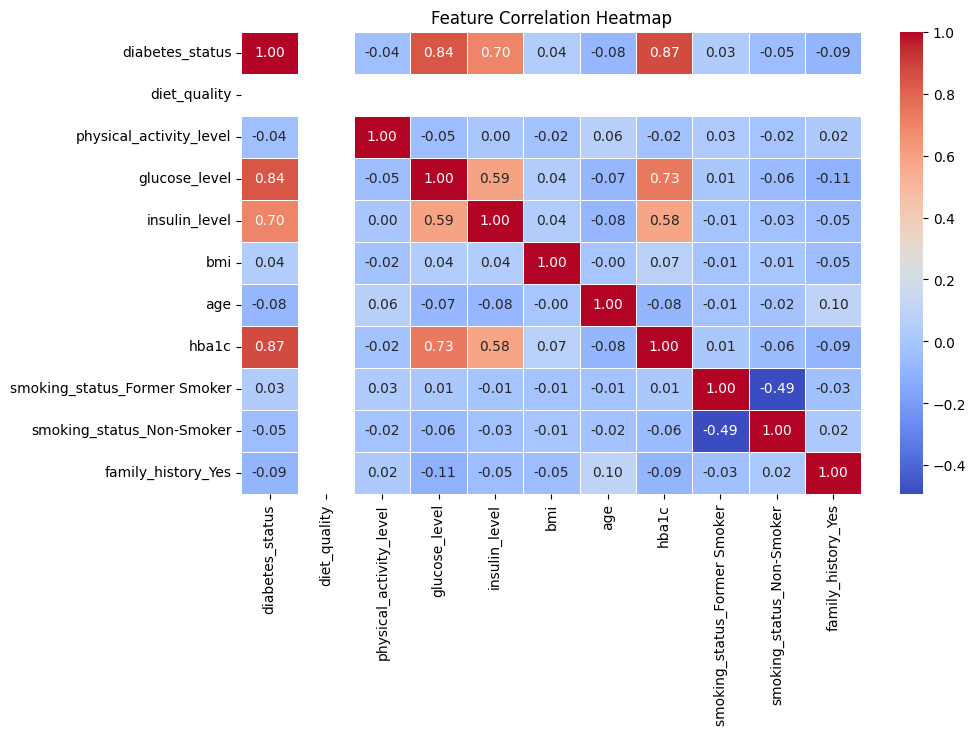

In [67]:
corr_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### Feature Importance Using Random Forest

In [71]:
X = df.drop(columns=['diabetes_status'])  
y = df['diabetes_status']                 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importance from Random Forest:")
print(feature_importances)


Feature Importance from Random Forest:
                        Feature  Importance
6                         hba1c    0.494469
2                 glucose_level    0.350630
3                 insulin_level    0.128324
4                           bmi    0.010643
5                           age    0.009153
1       physical_activity_level    0.001863
9            family_history_Yes    0.001803
8     smoking_status_Non-Smoker    0.001628
7  smoking_status_Former Smoker    0.001486
0                  diet_quality    0.000000


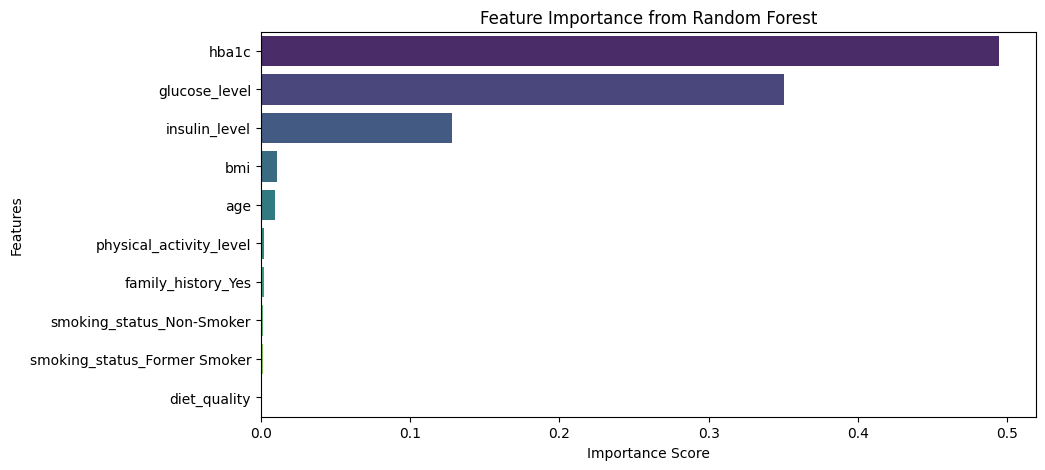

In [70]:
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances['Importance'], 
            y=feature_importances['Feature'], 
            hue=feature_importances['Feature'],
            palette="viridis", 
            legend=False)

plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


#### Feature Selection Using Mutual Information

In [20]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

mi_scores = mutual_info_classif(X_train, y_train)

mi_df = pd.DataFrame({"Feature": X_train.columns, "MI Score": mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)
print(mi_df)


                   Feature  MI Score
4            Glucose_Level  0.534365
5            Insulin_Level  0.389912
8                    HbA1c  0.305057
1  Physical_Activity_Level  0.017696
6                      BMI  0.002840
0             Diet_Quality  0.000000
2           Smoking_Status  0.000000
3           Family_History  0.000000
7                      Age  0.000000


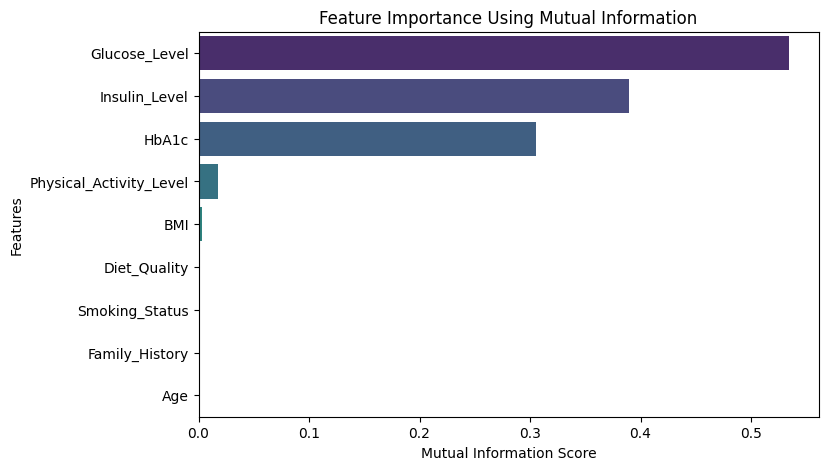

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=mi_df["MI Score"], y=mi_df["Feature"], hue=mi_df["Feature"], palette="viridis", legend=False)  # Fixed
plt.title("Feature Importance Using Mutual Information")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.show()

In [22]:
top_features = mi_df["Feature"].head(5).tolist()

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

print("Selected Features:", top_features)


Selected Features: ['Glucose_Level', 'Insulin_Level', 'HbA1c', 'Physical_Activity_Level', 'BMI']


## Train-Test Splitting and Class Balancing


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [11]:
file_path = "diabetic_prediction_dataset_v2.csv"
df = pd.read_csv(file_path)

categorical_cols = ["Diet_Quality", "Physical_Activity_Level", "Smoking_Status", "Family_History", "HbA1c"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) 
    label_encoders[col] = le

X = df.drop(columns=["Diabetes_Status"]) 
y = df["Diabetes_Status"]


#### Train-Test Splitting

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Data Distribution:", Counter(y_train))
print("Testing Data Distribution:", Counter(y_test))


Training Data Distribution: Counter({0: 411, 1: 389})
Testing Data Distribution: Counter({0: 103, 1: 97})


In [13]:
class_distribution = Counter(y_train)
print("Class distribution in training data:", class_distribution)


Class distribution in training data: Counter({0: 411, 1: 389})


####  Checking for Class Imbalance

In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

undersample = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersample.fit_resample(X_train, y_train)

print("After SMOTE (Oversampling):", Counter(y_train_resampled))
print("After Undersampling:", Counter(y_train_undersampled))


After SMOTE (Oversampling): Counter({1: 411, 0: 411})
After Undersampling: Counter({0: 389, 1: 389})


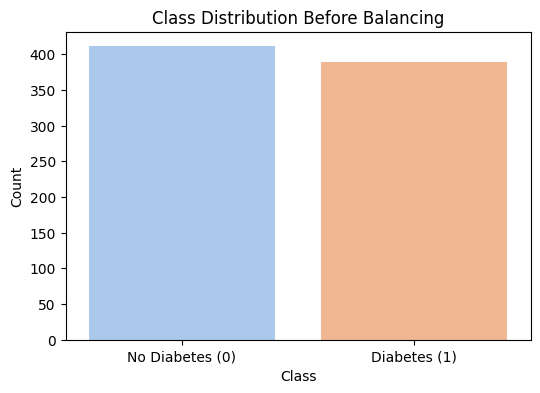

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(y_data, title):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y_data, hue=y_data, palette="pastel", legend=False)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(ticks=[0, 1], labels=["No Diabetes (0)", "Diabetes (1)"])
    plt.show()
plot_class_distribution(y_train, "Class Distribution Before Balancing")


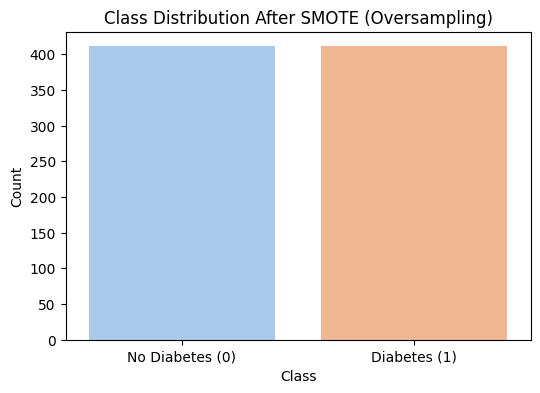

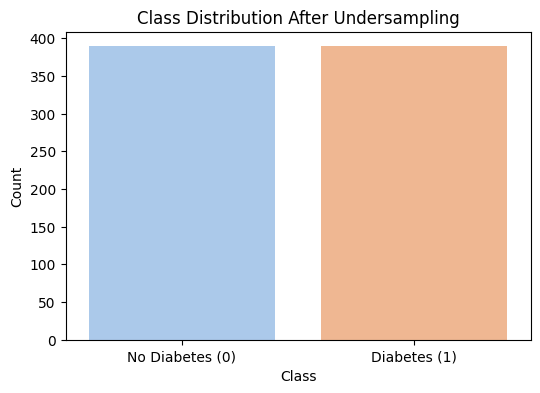

In [19]:
plot_class_distribution(y_train_resampled, "Class Distribution After SMOTE (Oversampling)")

plot_class_distribution(y_train_undersampled, "Class Distribution After Undersampling")

# Checking for Data Leakage

####  Ensure No Test Data Was Used During Feature Engineering

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Check for Duplicate Records Between Train & Test

In [25]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
duplicate_records = X_train_df.merge(X_test_df, how='inner')

print("Number of duplicate records in test set:", duplicate_records.shape[0])


Number of duplicate records in test set: 0


#### Ensure No Target-Related Features Are Included

In [26]:
correlation = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print("Potential data leakage features:\n", correlation[correlation > 0.8])


Potential data leakage features:
 Glucose_Level    0.838838
dtype: float64


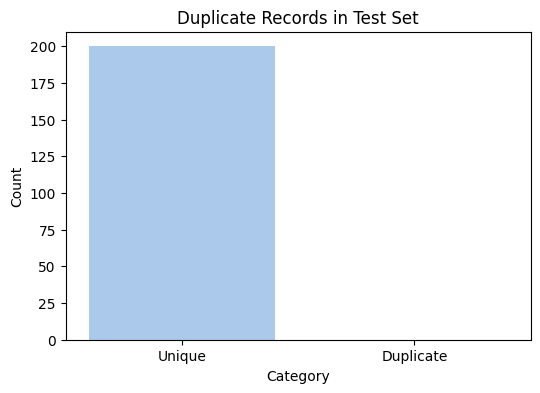

In [32]:
num_duplicates = duplicate_records.shape[0]
num_unique = X_test.shape[0] - num_duplicates

df_duplicates = pd.DataFrame({"Category": ["Unique", "Duplicate"], "Count": [num_unique, num_duplicates]})
plt.figure(figsize=(6, 4))
sns.barplot(data=df_duplicates, x="Category", y="Count", hue="Category", palette="pastel")
plt.title("Duplicate Records in Test Set")
plt.ylabel("Count")
plt.show()


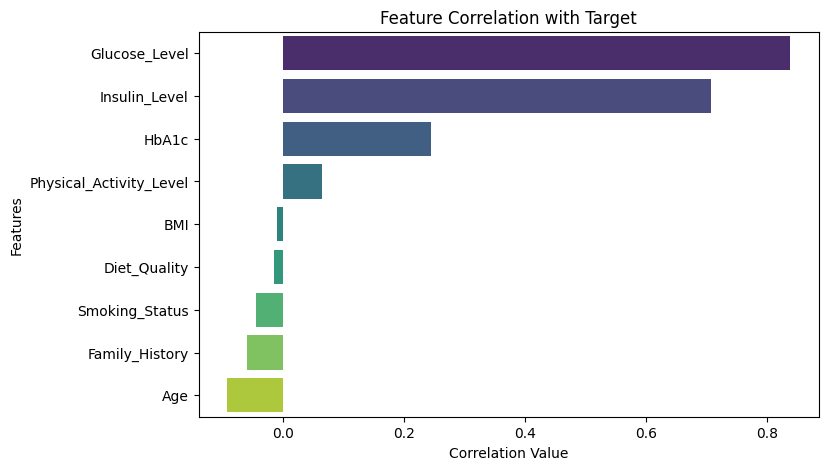

In [33]:
correlation = X_train.corrwith(y_train).sort_values(ascending=False)
correlation_df = correlation.reset_index()
correlation_df.columns = ["Feature", "Correlation"]

plt.figure(figsize=(8, 5))
sns.barplot(data=correlation_df, x="Correlation", y="Feature", hue="Feature", palette="viridis", legend=False)  # Final fix
plt.title("Feature Correlation with Target")
plt.xlabel("Correlation Value")
plt.ylabel("Features")
plt.show()
